In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
crypto = pd.read_csv("C:/Users/user/Downloads/Crypto_data/train.csv")
crypto.head()

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
0,1514764860,2,40.0,2376.5800,2399.5000,2357.1400,2374.5900,19.233005,2373.116392,-0.004218
1,1514764860,0,5.0,8.5300,8.5300,8.5300,8.5300,78.380000,8.530000,-0.014399
2,1514764860,1,229.0,13835.1940,14013.8000,13666.1100,13850.1760,31.550062,13827.062093,-0.014643
3,1514764860,5,32.0,7.6596,7.6596,7.6567,7.6576,6626.713370,7.657713,-0.013922
4,1514764860,7,5.0,25.9200,25.9200,25.8740,25.8770,121.087310,25.891363,-0.008264


In [3]:
asset_id = pd.read_csv("C:/Users/user/Downloads/Crypto_data/asset_details.csv")
asset_id

,Asset_ID,Weight,Asset_Name
0,2,2.397895,Bitcoin Cash
1,0,4.304065,Binance Coin
2,1,6.779922,Bitcoin
3,5,1.386294,EOS.IO
4,7,2.079442,Ethereum Classic
5,6,5.894403,Ethereum
6,9,2.397895,Litecoin
7,11,1.609438,Monero
8,13,1.791759,TRON
9,12,2.079442,Stellar


In [4]:
df = pd.merge(crypto, asset_id, on="Asset_ID")
df.head()

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target,Weight,Asset_Name
0,1514764860,2,40.0,2376.580000,2399.5,2357.14,2374.590000,19.233005,2373.116392,-0.004218,2.397895,Bitcoin Cash
1,1514764920,2,53.0,2374.553333,2400.9,2354.20,2372.286667,24.050259,2371.434498,-0.004079,2.397895,Bitcoin Cash
2,1514764980,2,61.0,2371.633333,2401.9,2353.70,2372.063333,42.676438,2375.442755,-0.002892,2.397895,Bitcoin Cash
3,1514765040,2,95.0,2376.060000,2406.4,2344.00,2370.566667,37.820918,2371.096152,-0.003718,2.397895,Bitcoin Cash
4,1514765100,2,33.0,2372.656667,2404.6,2343.40,2370.173333,8.519679,2370.345730,-0.002171,2.397895,Bitcoin Cash


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24236806 entries, 0 to 24236805
Data columns (total 12 columns):
 #   Column      Dtype  
---  ------      -----  
 0   timestamp   int64  
 1   Asset_ID    int64  
 2   Count       float64
 3   Open        float64
 4   High        float64
 5   Low         float64
 6   Close       float64
 7   Volume      float64
 8   VWAP        float64
 9   Target      float64
 10  Weight      float64
 11  Asset_Name  object 
dtypes: float64(9), int64(2), object(1)
memory usage: 2.3+ GB


In [6]:
df.dropna()

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target,Weight,Asset_Name
0,1514764860,2,40.0,2376.580000,2399.500000,2357.140000,2374.590000,1.923301e+01,2373.116392,-0.004218,2.397895,Bitcoin Cash
1,1514764920,2,53.0,2374.553333,2400.900000,2354.200000,2372.286667,2.405026e+01,2371.434498,-0.004079,2.397895,Bitcoin Cash
2,1514764980,2,61.0,2371.633333,2401.900000,2353.700000,2372.063333,4.267644e+01,2375.442755,-0.002892,2.397895,Bitcoin Cash
3,1514765040,2,95.0,2376.060000,2406.400000,2344.000000,2370.566667,3.782092e+01,2371.096152,-0.003718,2.397895,Bitcoin Cash
4,1514765100,2,33.0,2372.656667,2404.600000,2343.400000,2370.173333,8.519679e+00,2370.345730,-0.002171,2.397895,Bitcoin Cash
...,...,...,...,...,...,...,...,...,...,...,...,...
24236785,1632181200,4,368.0,0.206413,0.206800,0.206189,0.206668,1.138012e+06,0.206410,-0.001142,3.555348,Dogecoin
24236786,1632181260,4,492.0,0.206678,0.207600,0.206600,0.207477,9.265400e+05,0.207158,-0.001968,3.555348,Dogecoin
24236787,1632181320,4,533.0,0.207441,0.207800,0.207150,0.207581,1.257670e+06,0.207482,-0.000885,3.555348,Dogecoin
24236788,1632181380,4,398.0,0.207630,0.207806,0.207069,0.207149,7.936826e+05,0.207471,0.001079,3.555348,Dogecoin


In [7]:
df1 = df.drop(["Asset_ID", "VWAP", "Target", "Weight"], axis=1)
df1.head()

,timestamp,Count,Open,High,Low,Close,Volume,Asset_Name
0,1514764860,40.0,2376.580000,2399.5,2357.14,2374.590000,19.233005,Bitcoin Cash
1,1514764920,53.0,2374.553333,2400.9,2354.20,2372.286667,24.050259,Bitcoin Cash
2,1514764980,61.0,2371.633333,2401.9,2353.70,2372.063333,42.676438,Bitcoin Cash
3,1514765040,95.0,2376.060000,2406.4,2344.00,2370.566667,37.820918,Bitcoin Cash
4,1514765100,33.0,2372.656667,2404.6,2343.40,2370.173333,8.519679,Bitcoin Cash


In [8]:
df1["timestamp"] = pd.to_datetime(df1["timestamp"], unit="s")
df1[:10]

,timestamp,Count,Open,High,Low,Close,Volume,Asset_Name
0,2018-01-01 00:01:00,40.0,2376.580000,2399.5,2357.14,2374.590000,19.233005,Bitcoin Cash
1,2018-01-01 00:02:00,53.0,2374.553333,2400.9,2354.20,2372.286667,24.050259,Bitcoin Cash
2,2018-01-01 00:03:00,61.0,2371.633333,2401.9,2353.70,2372.063333,42.676438,Bitcoin Cash
3,2018-01-01 00:04:00,95.0,2376.060000,2406.4,2344.00,2370.566667,37.820918,Bitcoin Cash
4,2018-01-01 00:05:00,33.0,2372.656667,2404.6,2343.40,2370.173333,8.519679,Bitcoin Cash
5,2018-01-01 00:06:00,44.0,2368.806667,2400.1,2344.00,2367.486667,27.459795,Bitcoin Cash
6,2018-01-01 00:07:00,29.0,2367.920000,2399.8,2343.00,2366.860000,57.679405,Bitcoin Cash
7,2018-01-01 00:08:00,69.0,2366.680000,2399.5,2343.00,2366.710000,42.115560,Bitcoin Cash
8,2018-01-01 00:09:00,30.0,2365.513333,2399.4,2343.80,2366.476667,21.652614,Bitcoin Cash
9,2018-01-01 00:10:00,102.0,2367.343333,2399.4,2342.00,2356.300000,36.268655,Bitcoin Cash


In [9]:
df1 = df1.rename(columns={"timestamp":"Date"})
df1[:10]

,Date,Count,Open,High,Low,Close,Volume,Asset_Name
0,2018-01-01 00:01:00,40.0,2376.580000,2399.5,2357.14,2374.590000,19.233005,Bitcoin Cash
1,2018-01-01 00:02:00,53.0,2374.553333,2400.9,2354.20,2372.286667,24.050259,Bitcoin Cash
2,2018-01-01 00:03:00,61.0,2371.633333,2401.9,2353.70,2372.063333,42.676438,Bitcoin Cash
3,2018-01-01 00:04:00,95.0,2376.060000,2406.4,2344.00,2370.566667,37.820918,Bitcoin Cash
4,2018-01-01 00:05:00,33.0,2372.656667,2404.6,2343.40,2370.173333,8.519679,Bitcoin Cash
5,2018-01-01 00:06:00,44.0,2368.806667,2400.1,2344.00,2367.486667,27.459795,Bitcoin Cash
6,2018-01-01 00:07:00,29.0,2367.920000,2399.8,2343.00,2366.860000,57.679405,Bitcoin Cash
7,2018-01-01 00:08:00,69.0,2366.680000,2399.5,2343.00,2366.710000,42.115560,Bitcoin Cash
8,2018-01-01 00:09:00,30.0,2365.513333,2399.4,2343.80,2366.476667,21.652614,Bitcoin Cash
9,2018-01-01 00:10:00,102.0,2367.343333,2399.4,2342.00,2356.300000,36.268655,Bitcoin Cash


In [10]:
bitcoin = df1.loc[df1["Asset_Name"] == "Bitcoin"]
bitcoin.head()

,Date,Count,Open,High,Low,Close,Volume,Asset_Name
3896156,2018-01-01 00:01:00,229.0,13835.194,14013.8,13666.11,13850.176,31.550062,Bitcoin
3896157,2018-01-01 00:02:00,235.0,13835.036,14052.3,13680.00,13828.102,31.046432,Bitcoin
3896158,2018-01-01 00:03:00,528.0,13823.900,14000.4,13601.00,13801.314,55.061820,Bitcoin
3896159,2018-01-01 00:04:00,435.0,13802.512,13999.0,13576.28,13768.040,38.780529,Bitcoin
3896160,2018-01-01 00:05:00,742.0,13766.000,13955.9,13554.44,13724.914,108.501637,Bitcoin


In [11]:
bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1956282 entries, 3896156 to 5852437
Data columns (total 8 columns):
 #   Column      Dtype         
---  ------      -----         
 0   Date        datetime64[ns]
 1   Count       float64       
 2   Open        float64       
 3   High        float64       
 4   Low         float64       
 5   Close       float64       
 6   Volume      float64       
 7   Asset_Name  object        
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 134.3+ MB


In [12]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (12, 8)
plt.style.use("seaborn-darkgrid")

<AxesSubplot:xlabel='Date'>

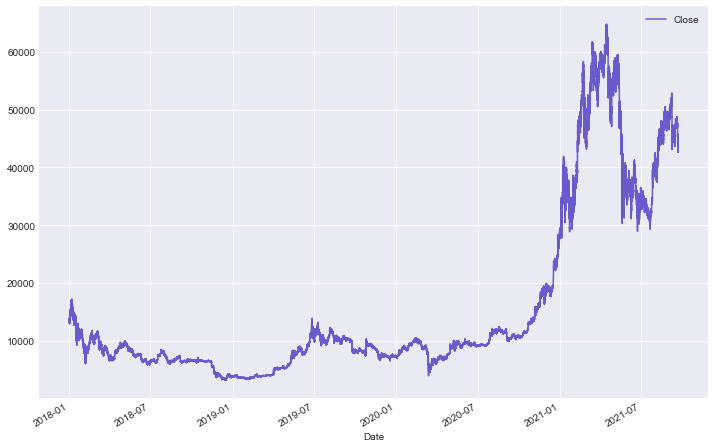

In [13]:
bitcoin.plot(x="Date", y="Close", color="slateblue")

In [14]:
# Set date as index
bitcoin.set_index(pd.DatetimeIndex(bitcoin["Date"]), inplace=True)

In [15]:
bitcoin = bitcoin[["Close"]]

In [16]:
bitcoin[:10]

,Close
Date,
2018-01-01 00:01:00,13850.176
2018-01-01 00:02:00,13828.102
2018-01-01 00:03:00,13801.314
2018-01-01 00:04:00,13768.040
2018-01-01 00:05:00,13724.914
2018-01-01 00:06:00,13717.112
2018-01-01 00:07:00,13670.940
2018-01-01 00:08:00,13721.348
2018-01-01 00:09:00,13720.260


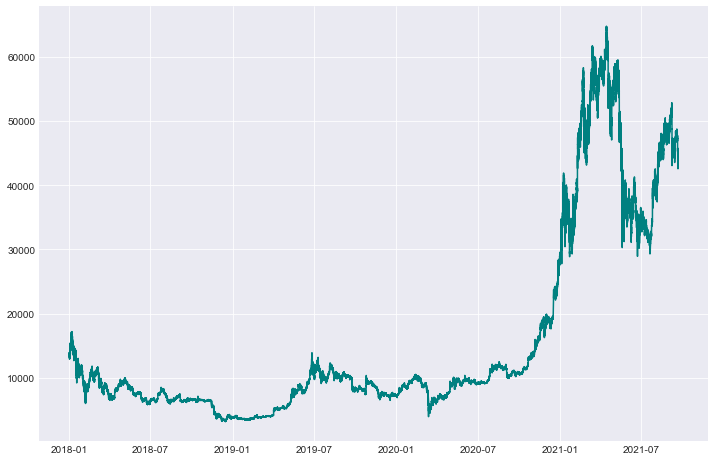

In [17]:
plt.plot(bitcoin, color="teal")

In [18]:
bitcoin["ema5"] = bitcoin["Close"].ewm(span=7200).mean()
bitcoin["ema13"] = bitcoin["Close"].ewm(span=18720).mean()
bitcoin.head()

<ipython-input-18-bfeb136351d7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bitcoin["ema5"] = bitcoin["Close"].ewm(span=7200).mean()
<ipython-input-18-bfeb136351d7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bitcoin["ema13"] = bitcoin["Close"].ewm(span=18720).mean()


,Close,ema5,ema13
Date,,,
2018-01-01 00:01:00,13850.176,13850.176000,13850.176000
2018-01-01 00:02:00,13828.102,13839.137467,13839.138410
2018-01-01 00:03:00,13801.314,13826.526142,13826.528927
2018-01-01 00:04:00,13768.040,13811.898514,13811.904352
2018-01-01 00:05:00,13724.914,13794.491945,13794.502563


Text(0, 0.5, 'Price')

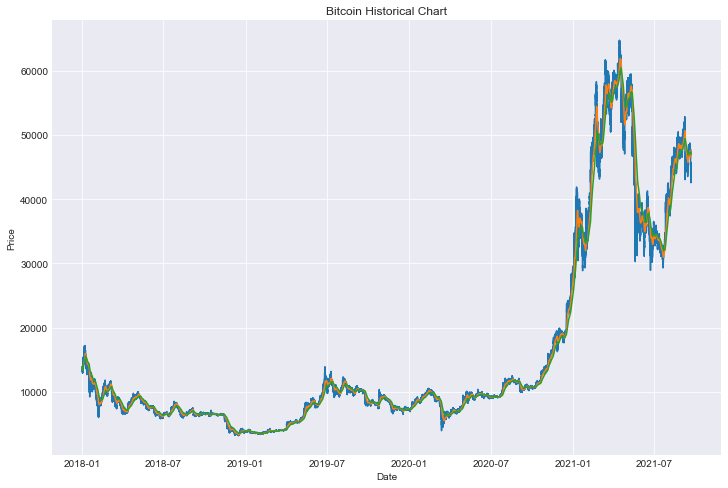

In [19]:
plt.plot(bitcoin)
plt.title("Bitcoin Historical Chart")
plt.xlabel("Date")
plt.ylabel("Price")

In [20]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing, svm

In [21]:
X_train, X_test, y_train, y_test = train_test_split(bitcoin[["Close"]], bitcoin[["ema5"]], test_size=0.3)

X_train.describe()

,Close
count,1.369397e+06
mean,1.561687e+04
std,1.512351e+04
min,3.153762e+03
25%,6.847895e+03
50%,9.206617e+03
75%,1.348072e+04
max,6.468241e+04


In [22]:
X_test.describe()

,Close
count,586885.000000
mean,15597.691683
std,15116.602669
min,3151.545000
25%,6848.588571
50%,9204.446910
75%,13428.625000
max,64808.537275


In [23]:
model = LinearRegression(normalize=True)
model.fit(X_train, y_train)

LinearRegression(normalize=True)

In [24]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [25]:
y_pred = model.predict(X_test)

In [26]:
print("Model Coefficient", model.coef_)
print("Mean Absolute Error", mean_absolute_error(y_test, y_pred))
print("r2 Score", r2_score(y_test, y_pred))

Model Coefficient [[0.99177094]]
Mean Absolute Error 532.4885257072045
r2 Score 0.9955238101239305
